In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

# World Cup Problem: France vs Croatia

### In the World Cup 2018, France defeated Croatia by 4 - 2
1. How confident should we be that France is the better team?
2. If the same teams played again, what is the chance France would win again?

In [3]:
# Assume average number of goals per game is 2
# Probability of scoring 4 goals in a game

goals = 4
lam = 2

probs_of_scoring_4 = poisson.pmf(goals, lam)
probs_of_scoring_4


0.09022352215774178

### Bayesian Vew

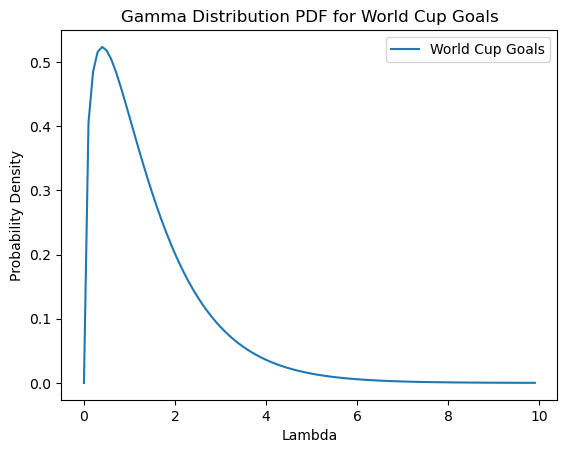

In [43]:
# Using the gamma distribution
# Using historical value of the average number of times team score per game

from scipy.stats import gamma, poisson

avg_world_cup = 1.4
lambda_range = np.arange(0, 10, .1)


gamma_vals = [gamma.pdf(lam, avg_world_cup) for lam in lambda_range]

plt.plot(lambda_range, gamma_vals, label='World Cup Goals')
plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution PDF for World Cup Goals')
plt.legend()
plt.show()

In [41]:
gamma_vals_array = np.array(gamma_vals)

# Find the index of the maximum value
max_index = gamma_vals_array.argmax()

# Find the MAP estimate
map_estimate = lambda_range[max_index]

# Get the value of the gamma PDF at the MAP estimate
map_value = gamma_vals_array[max_index]

# Print the MAP estimate and its value
print("MAP estimate (lambda):", map_estimate)
print("Value at MAP estimate (gamma PDF):", map_value)

MAP estimate (lambda): 0.4
Value at MAP estimate (gamma PDF): 0.5236648604477927


### Update Function

In [32]:
def likelihood_poisson(lam, data):
    '''Returns the likelihood of seeing a k goals for goal scoring rate lambda'''
    return [poisson.pmf(data, l)  for l in lam]
    
def update(distribution, likelihood):
    '''our standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

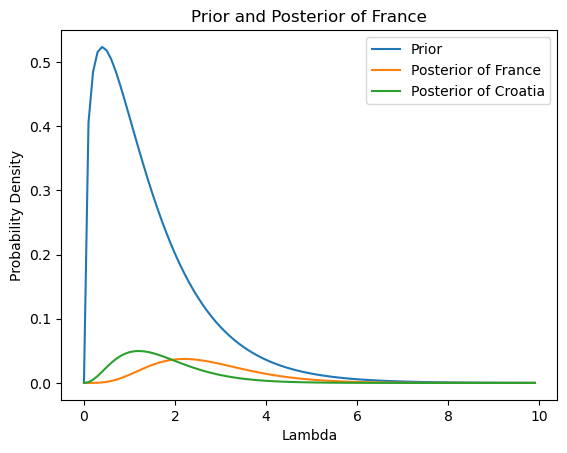

In [33]:
prior = pd.DataFrame({'lams':lambda_range,'probs':gamma/sum(gamma)})
france = prior.copy()
croatia = prior.copy()
update(france, likelihood_poisson(france['lams'], 4));
update(croatia, likelihood_poisson(france['lams'], 2));

plt.plot(lambda_range, gamma, label='Prior')
plt.plot(france['lams'], france['probs'], label='Posterior of France')
plt.plot(croatia['lams'], croatia['probs'], label='Posterior of Croatia')

plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior of France')
plt.legend()
plt.show()

## Probabilty of Superiority

In [44]:
def prob_of_s(dist1, dist2):
    """Compute the probability of superiority."""
    total = 0
    for index1, row1 in dist1.iterrows():
        for index2, row2 in dist2.iterrows():
            if row1['lams'] > row2['lams']:
                total += row1['probs'] * row2['probs']
    return total

prob_of_s(france, croatia)

0.7499355407920673

## Predicting the Rematch

In [45]:
pmf_table = pd.DataFrame([[poisson.pmf(goals,lam) for goals in range(10)] for lam in prior['lams']])
pmf_table = (pmf_table.T / pmf_table.T.sum()).T
pmf_table

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.904837,0.090484,0.004524,0.000151,0.000004,7.540312e-08,1.256719e-09,1.795312e-11,2.244140e-13,2.493489e-15
2,0.818731,0.163746,0.016375,0.001092,0.000055,2.183282e-06,7.277607e-08,2.079316e-09,5.198290e-11,1.155176e-12
3,0.740818,0.222245,0.033337,0.003334,0.000250,1.500157e-05,7.500784e-07,3.214622e-08,1.205483e-09,4.018277e-11
4,0.670320,0.268128,0.053626,0.007150,0.000715,5.720064e-05,3.813376e-06,2.179072e-07,1.089536e-08,4.842383e-10
...,...,...,...,...,...,...,...,...,...,...
95,0.000143,0.001363,0.006473,0.020497,0.048681,9.249398e-02,1.464488e-01,1.987519e-01,2.360179e-01,2.491300e-01
96,0.000133,0.001278,0.006133,0.019626,0.047103,9.043735e-02,1.446998e-01,1.984454e-01,2.381345e-01,2.540101e-01
97,0.000124,0.001199,0.005813,0.018795,0.045578,8.842148e-02,1.429481e-01,1.980852e-01,2.401783e-01,2.588588e-01
98,0.000115,0.001125,0.005511,0.018002,0.044105,8.644639e-02,1.411958e-01,1.976741e-01,2.421507e-01,2.636753e-01


In [48]:
plt.plot(prior['lams'], pmf_table['1'], label='Lambda = 0')
plt.plot(prior['lams'], pmf_table['2'], label='Lambda = 1')
plt.plot(prior['lams'], pmf_table['3'], label='Lambda = 2')

plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior of France')
plt.legend()
plt.show()

KeyError: '1'

In [ ]:
pred_france = make_mixture(pmf_table, france['probs'])
pred_croatia = make_mixture(pmf_table, croatia['probs'])

NameError: name 'make_mixture' is not defined

In [ ]:
prob_of_s(pd.DataFrame({'lams':range(10), 'probs':pred_france}),pd.DataFrame({'lams':range(10), 'probs':pred_croatia}))
